In [16]:
import os
from annot import annotations
import matplotlib.pyplot as plt
from matplotlib import image
import cv2
import utility
import numpy as np
import configurations
import model_gen
import tensorflow as tf

In [17]:
data_loader = annotations.Data()
util = utility.Util()
config = configurations.Configuration()

In [18]:
df = util.get_dataframe()

In [19]:
sample = list(df.iloc[1])

In [20]:
im = util.imread_from_id(sample[0])
keypoints = np.array(sample[1:])

In [21]:
keypoints

array([738, 538, 734, 440, 717, 355, 770, 355, 766, 443, 768, 523, 744,
       355, 737, 216, 739, 197, 745, 132, 639, 302, 684, 276, 692, 217,
       782, 215, 805, 280, 850, 308, 754, 335])

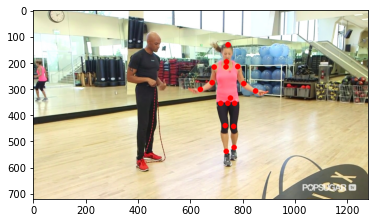

In [31]:
plt.imshow(util.to_rgb(util.draw_keypoints(im, keypoints, 10)))

In [23]:
model = tf.keras.models.load_model("models/model_v5/")

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [25]:
config.INPUT_DIMS[:2]

(224, 224)

In [26]:
resized = cv2.resize(im.copy(), (224,224))
rescaled = resized / 255

In [27]:
rescaled.shape

(224, 224, 3)

In [28]:
y_pred = model.predict(rescaled.reshape(1,224,224,3))

1/1 [==============================] - 0s 158ms/step


In [29]:
y_pred.ravel().astype(int)

array([486, 482, 478, 481, 490, 482, 473, 487, 479, 467, 487, 482, 478,
       475, 477, 492, 490, 490, 487, 483, 509, 493, 485, 491, 493, 484,
       491, 489, 485, 482, 489, 492, 497, 482])

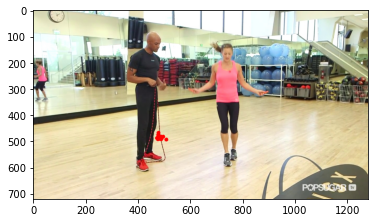

In [30]:
plt.imshow(util.to_rgb(util.draw_keypoints(im, y_pred.ravel(), 7)))